# 数据分析和绘图

In [22]:
%matplotlib inline
%config ZMQInteractiveShell.ast_node_interactivity='all'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False   #用来正常显示负号

## 招聘数据分析

In [23]:
# 招聘数据分析
df = pd.read_csv('pl_09/DataAnalyst.csv', encoding='gb2312')
df.head(3)

,city,companyFullName,companyId,companyLabelList,companyShortName,companySize,businessZones,firstType,secondType,education,industryField,positionId,positionAdvantage,positionName,positionLables,salary,workYear
0,上海,纽海信息技术(上海)有限公司,8581,"['技能培训', '节日礼物', '带薪年假', '岗位晋升']",1号店,2000人以上,['张江'],技术,数据开发,硕士,移动互联网,2537336,知名平台,数据分析师,"['分析师', '数据分析', '数据挖掘', '数据']",7k-9k,应届毕业生
1,上海,上海点荣金融信息服务有限责任公司,23177,"['节日礼物', '带薪年假', '岗位晋升', '扁平管理']",点融网,500-2000人,"['五里桥', '打浦桥', '制造局路']",技术,数据开发,本科,金融,2427485,"挑战机会,团队好,与大牛合作,工作环境好",数据分析师-CR2017-SH2909,"['分析师', '数据分析', '数据挖掘', '数据']",10k-15k,应届毕业生
2,上海,上海晶樵网络信息技术有限公司,57561,"['技能培训', '绩效奖金', '岗位晋升', '管理规范']",SPD,50-150人,['打浦桥'],设计,数据分析,本科,移动互联网,2511252,"时间自由,领导nic",数据分析师,"['分析师', '数据分析', '数据']",4k-6k,应届毕业生


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6876 entries, 0 to 6875
Data columns (total 17 columns):
city                 6876 non-null object
companyFullName      6876 non-null object
companyId            6876 non-null int64
companyLabelList     6170 non-null object
companyShortName     6876 non-null object
companySize          6876 non-null object
businessZones        4873 non-null object
firstType            6869 non-null object
secondType           6870 non-null object
education            6876 non-null object
industryField        6876 non-null object
positionId           6876 non-null int64
positionAdvantage    6876 non-null object
positionName         6876 non-null object
positionLables       6844 non-null object
salary               6876 non-null object
workYear             6876 non-null object
dtypes: int64(2), object(15)
memory usage: 913.3+ KB


In [27]:
# 拆分工资字符串 *** 会出错
arr = df.salary.str.split('-')
arr_df = pd.DataFrame(arr.tolist(), columns=['bottom', 'top'])
arr_df['top'] = arr_df['top'].str[:-1]
arr_df['bottom'] = arr_df['bottom'].str[:-1]
arr_df.head()
len(arr)
arr_df.bottom.value_counts()
arr_df.top.value_counts()

,bottom,top
0,7,9
1,10,15
2,4,6
3,6,8
4,2,3


6876

15      1618
10      1133
20       857
8        668
6        391
25       269
12       265
4        247
5        237
3        188
2        155
18       151
30       142
7        141
13       100
9         88
40        28
14        27
16        26
1         24
22        11
35        11
15k以      10
17        10
8k以       10
25k以       9
11         9
50         7
23         5
6k以        4
20k以       4
4k以        3
30k以       3
21         3
24         2
60         2
2k以        2
36         2
33         2
10k以       2
45         2
40k以       2
5k以        1
9k以        1
28         1
12k以       1
50k以       1
38         1
Name: bottom, dtype: int64

30     1160
20     1016
25      737
15      670
40      421
10      333
12      290
35      268
8       226
6       204
16      175
18      173
50      140
4       132
5       108
24       88
14       85
3        79
9        64
7        59
60       50
28       44
45       39
22       35
36       27
26       24
2        24
13       24
19       17
17       15
23       15
32       14
11       13
27       11
70        8
80        6
33        6
38        4
100       4
44        4
34        3
21        3
65        2
37        1
58        1
39        1
Name: top, dtype: int64

In [28]:
# 删除重复职位
df = df.drop_duplicates(subset='positionId', keep='first')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5031 entries, 0 to 6766
Data columns (total 17 columns):
city                 5031 non-null object
companyFullName      5031 non-null object
companyId            5031 non-null int64
companyLabelList     4529 non-null object
companyShortName     5031 non-null object
companySize          5031 non-null object
businessZones        3535 non-null object
firstType            5027 non-null object
secondType           5028 non-null object
education            5031 non-null object
industryField        5031 non-null object
positionId           5031 non-null int64
positionAdvantage    5031 non-null object
positionName         5031 non-null object
positionLables       5007 non-null object
salary               5031 non-null object
workYear             5031 non-null object
dtypes: int64(2), object(15)
memory usage: 707.5+ KB


In [5]:
arr = df.salary.str.split('-')
arr_df = pd.DataFrame(arr.tolist(), columns=['bottom', 'top'])
arr_df

,bottom,top
0,7k,9k
1,10k,15k
2,4k,6k
3,6k,8k
4,2k,3k
5,10k,15k
6,7k,14k
7,5k,7k
8,4k,8k
9,2k,4k


In [12]:
"8k-16k".split('-')

['8k', '16k']

In [30]:
# 加工salary字段
def get_salary(salary, method='None'):
    arr = salary.split('-')
    if len(arr) == 1:
        bottom = arr[0].upper()
        bottom = bottom[:bottom.find('K')]
        top = bottom
    else:
        bottom = arr[0][:-1]
        top = arr[1].upper()
        top = top[:top.find('K')]
    if method == 'top':
        return top
    elif method == 'bottom':
        return bottom

df['bottomSalary'] = df.salary.apply(get_salary, method='bottom')
df.bottomSalary = df.bottomSalary.astype('int') # 类型转换
df['topSalary'] = df.salary.apply(get_salary, method='top')
df.topSalary = df.topSalary.astype('int') # 类型转换
df['avgSalary'] = (df['bottomSalary'] + df['topSalary']) / 2
df.head()

len(df)
df.bottomSalary.value_counts()
df.topSalary.value_counts()
df['avgSalary'].value_counts()

,city,companyFullName,companyId,companyLabelList,companyShortName,companySize,businessZones,firstType,secondType,education,industryField,positionId,positionAdvantage,positionName,positionLables,salary,workYear,bottomSalary,topSalary,avgSalary
0,上海,纽海信息技术(上海)有限公司,8581,"['技能培训', '节日礼物', '带薪年假', '岗位晋升']",1号店,2000人以上,['张江'],技术,数据开发,硕士,移动互联网,2537336,知名平台,数据分析师,"['分析师', '数据分析', '数据挖掘', '数据']",7k-9k,应届毕业生,7,9,8.0
1,上海,上海点荣金融信息服务有限责任公司,23177,"['节日礼物', '带薪年假', '岗位晋升', '扁平管理']",点融网,500-2000人,"['五里桥', '打浦桥', '制造局路']",技术,数据开发,本科,金融,2427485,"挑战机会,团队好,与大牛合作,工作环境好",数据分析师-CR2017-SH2909,"['分析师', '数据分析', '数据挖掘', '数据']",10k-15k,应届毕业生,10,15,12.5
2,上海,上海晶樵网络信息技术有限公司,57561,"['技能培训', '绩效奖金', '岗位晋升', '管理规范']",SPD,50-150人,['打浦桥'],设计,数据分析,本科,移动互联网,2511252,"时间自由,领导nic",数据分析师,"['分析师', '数据分析', '数据']",4k-6k,应届毕业生,4,6,5.0
3,上海,杭州数云信息技术有限公司上海分公司,7502,"['绩效奖金', '股票期权', '五险一金', '通讯津贴']",数云,150-500人,"['龙华', '上海体育场', '万体馆']",市场与销售,数据分析,本科,"企业服务,数据服务",2427530,五险一金 绩效奖金 带薪年假 节日福利,大数据业务分析师【数云校招】,"['商业', '分析师', '大数据', '数据']",6k-8k,应届毕业生,6,8,7.0
4,上海,上海银基富力信息技术有限公司,130876,"['年底双薪', '通讯津贴', '定期体检', '绩效奖金']",银基富力,15-50人,"['上海影城', '新华路', '虹桥']",技术,软件开发,本科,其他,2245819,在大牛下指导,BI开发/数据分析师,"['分析师', '数据分析', '数据', 'BI']",2k-3k,应届毕业生,2,3,2.5


5031

15    1153
10     871
20     572
8      530
6      289
12     213
25     198
5      187
4      184
3      135
2      118
7      112
18     104
30      97
13      70
9       65
40      25
1       22
16      21
14      19
50       7
11       7
22       7
35       7
17       6
23       3
21       2
60       1
36       1
28       1
24       1
33       1
45       1
38       1
Name: bottomSalary, dtype: int64

30     799
20     766
15     542
25     531
40     277
10     254
12     217
35     182
8      177
6      150
16     137
18     135
4       99
50      94
5       79
24      68
14      68
3       60
9       47
7       47
60      40
28      32
45      28
22      26
2       23
13      22
26      19
36      17
19      13
23      12
17      12
27      10
11       9
32       8
70       5
80       5
100      4
38       4
33       3
44       2
21       2
34       2
65       1
58       1
37       1
39       1
Name: topSalary, dtype: int64

15.0    570
22.5    563
20.0    446
30.0    277
11.5    251
12.5    247
25.0    227
17.5    149
9.0     147
12.0    137
7.5     114
27.5    110
8.0     107
5.0      92
10.0     84
7.0      78
16.0     73
6.0      73
18.0     64
14.0     64
13.5     64
10.5     62
2.5      60
4.0      59
4.5      59
3.0      57
6.5      55
37.5     54
32.5     45
40.0     44
       ... 
18.5     11
14.5      9
21.0      8
15.5      8
29.0      4
55.0      4
20.5      4
60.0      4
75.0      4
30.5      4
23.5      3
22.0      3
31.5      3
33.0      2
28.5      2
42.5      2
26.0      2
29.5      2
31.0      1
34.0      1
52.5      1
25.5      1
65.0      1
28.0      1
43.0      1
36.5      1
2.0       1
32.0      1
48.0      1
70.0      1
Name: avgSalary, Length: 79, dtype: int64

In [31]:
# 选择关注的列
df = df[['city', 'companyShortName', 'companySize',
         'education', 'positionName', 'positionLables',
         'workYear', 'avgSalary']]
df.head()

,city,companyShortName,companySize,education,positionName,positionLables,workYear,avgSalary
0,上海,1号店,2000人以上,硕士,数据分析师,"['分析师', '数据分析', '数据挖掘', '数据']",应届毕业生,8.0
1,上海,点融网,500-2000人,本科,数据分析师-CR2017-SH2909,"['分析师', '数据分析', '数据挖掘', '数据']",应届毕业生,12.5
2,上海,SPD,50-150人,本科,数据分析师,"['分析师', '数据分析', '数据']",应届毕业生,5.0
3,上海,数云,150-500人,本科,大数据业务分析师【数云校招】,"['商业', '分析师', '大数据', '数据']",应届毕业生,7.0
4,上海,银基富力,15-50人,本科,BI开发/数据分析师,"['分析师', '数据分析', '数据', 'BI']",应届毕业生,2.5


In [32]:
# 统计各个城市的职位数
df.city.value_counts()

北京    2347
上海     979
深圳     527
杭州     406
广州     335
成都     135
南京      83
武汉      69
西安      38
苏州      37
厦门      30
长沙      25
天津      20
Name: city, dtype: int64

In [33]:
# 查看统计信息
df.describe()

,avgSalary
count,5031.000000
mean,17.111409
std,8.996242
min,1.500000
25%,11.500000
50%,15.000000
75%,22.500000
max,75.000000


In [34]:
# 查看各城市平均工资
df.groupby('city').mean()

,avgSalary
city,
上海,17.280388
北京,18.688539
南京,10.951807
厦门,10.966667
天津,8.250000
广州,12.702985
成都,12.848148
杭州,16.455665
武汉,11.297101


In [8]:
df.head()

,city,companyFullName,companyId,companyLabelList,companyShortName,companySize,businessZones,firstType,secondType,education,industryField,positionId,positionAdvantage,positionName,positionLables,salary,workYear
0,上海,纽海信息技术(上海)有限公司,8581,"['技能培训', '节日礼物', '带薪年假', '岗位晋升']",1号店,2000人以上,['张江'],技术,数据开发,硕士,移动互联网,2537336,知名平台,数据分析师,"['分析师', '数据分析', '数据挖掘', '数据']",7k-9k,应届毕业生
1,上海,上海点荣金融信息服务有限责任公司,23177,"['节日礼物', '带薪年假', '岗位晋升', '扁平管理']",点融网,500-2000人,"['五里桥', '打浦桥', '制造局路']",技术,数据开发,本科,金融,2427485,"挑战机会,团队好,与大牛合作,工作环境好",数据分析师-CR2017-SH2909,"['分析师', '数据分析', '数据挖掘', '数据']",10k-15k,应届毕业生
2,上海,上海晶樵网络信息技术有限公司,57561,"['技能培训', '绩效奖金', '岗位晋升', '管理规范']",SPD,50-150人,['打浦桥'],设计,数据分析,本科,移动互联网,2511252,"时间自由,领导nic",数据分析师,"['分析师', '数据分析', '数据']",4k-6k,应届毕业生
3,上海,杭州数云信息技术有限公司上海分公司,7502,"['绩效奖金', '股票期权', '五险一金', '通讯津贴']",数云,150-500人,"['龙华', '上海体育场', '万体馆']",市场与销售,数据分析,本科,"企业服务,数据服务",2427530,五险一金 绩效奖金 带薪年假 节日福利,大数据业务分析师【数云校招】,"['商业', '分析师', '大数据', '数据']",6k-8k,应届毕业生
4,上海,上海银基富力信息技术有限公司,130876,"['年底双薪', '通讯津贴', '定期体检', '绩效奖金']",银基富力,15-50人,"['上海影城', '新华路', '虹桥']",技术,软件开发,本科,其他,2245819,在大牛下指导,BI开发/数据分析师,"['分析师', '数据分析', '数据', 'BI']",2k-3k,应届毕业生


In [38]:
# 各城市按学位分组求平均工资
df_city_education = df.groupby(['city', 'education']).mean()
df_city_education

avgSalary
city education           
上海   不限         14.051471
     博士         15.000000
     大专         13.395455
     本科         17.987552
     硕士         19.180000
北京   不限         15.673387
     博士         25.000000
     大专         12.339474
     本科         19.435802
     硕士         19.759740
南京   不限          7.000000
     大专          9.272727
     本科         11.327869
     硕士         13.500000
厦门   不限         12.500000
     大专          6.785714
     本科         11.805556
     硕士         15.750000
天津   不限          3.500000
     大专          5.500000
     本科          9.300000
广州   不限          9.250000
     大专          8.988095
     本科         14.170259
     硕士         14.571429
成都   不限         10.562500
     大专         11.000000
     本科         13.520202
     硕士         12.750000
杭州   不限         18.269231
     大专         12.327586
     本科         16.823432
     硕士         20.710526
武汉   不限         10.950000
     大专         11.214286
     本科         11.500000
     硕士          7.000000
深圳   不限         15.100000
     博士         35.000000
     大专         13.898936
     本科         18.532911
     硕士         18.029412
苏州   大专         14.600000
     本科         14.310345
     硕士         16.833333
西安   不限          8.666667
     大专          8.150000
     本科         12.208333
     硕士          5.000000
长沙   不限          7.642857
     大专          9.000000
     本科         10.633333
     硕士          9.000000

In [39]:
# 优化展示
df_city_education = df_city_education.unstack()
df_city_education

avgSalary                                       
education         不限    博士         大专         本科         硕士
city                                                       
上海         14.051471  15.0  13.395455  17.987552  19.180000
北京         15.673387  25.0  12.339474  19.435802  19.759740
南京          7.000000   NaN   9.272727  11.327869  13.500000
厦门         12.500000   NaN   6.785714  11.805556  15.750000
天津          3.500000   NaN   5.500000   9.300000        NaN
广州          9.250000   NaN   8.988095  14.170259  14.571429
成都         10.562500   NaN  11.000000  13.520202  12.750000
杭州         18.269231   NaN  12.327586  16.823432  20.710526
武汉         10.950000   NaN  11.214286  11.500000   7.000000
深圳         15.100000  35.0  13.898936  18.532911  18.029412
苏州               NaN   NaN  14.600000  14.310345  16.833333
西安          8.666667   NaN   8.150000  12.208333   5.000000
长沙          7.642857   NaN   9.000000  10.633333   9.000000

In [40]:
# 查看各公司招聘数量与平均工资
df.groupby('companyShortName').avgSalary.agg(['count', 'mean']).sort_values(by='count', ascending=False)

,count,mean
companyShortName,,
美团点评,175,21.862857
滴滴出行,64,27.351562
百度,44,19.136364
网易,36,18.208333
今日头条,32,17.125000
腾讯,32,22.437500
京东,32,20.390625
百度外卖,31,17.774194
个推,31,14.516129


In [44]:
df.groupby('city').companyShortName.agg('sum')

city
上海    1号店点融网SPD数云银基富力青桐资本足球魔方安硕信息（amarsoft）上海崇杏55海淘莉...
北京    宜信友信清科集团西山居游戏译泰教育链家网大公国际畅游同心医联达达星宇恒达百度外卖尚德机构EN...
南京    付融宝通联数据希嘉创智东方网力畅途网中地控股运满满汉拓司法云平台国信证券江苏分公司西桥科技东...
厦门    4399美图公司科莫宝吉才神美柚美图公司浩渺网络海西医药交易中心美图公司美图公司厦门融通信息...
天津    神州优车集团众嘉禾励神州商龙广州卓为安正软件闯先生Mr.Chuang58到家神州商龙易商互动...
广州    BW广州卓为觅游信息雷克广州星集投资广真易广州星集投资Ways创幻科技赛酷比极光阿里巴巴移动...
成都    封面新闻中药材诚实通成都数字天空科技有限公司摩宝网络NEXA安恒信息购途网Tap4Fun啦啦...
杭州    海蜜全球购追灿科技边锋米络科技（KK直播）追灿科技政采云泰一指尚挖财挖财上上铺挖财酷家乐火石...
武汉    中国婚博会岗岭集团（1药网）引力互动榆钱金融FORMAX金融圈斗鱼直播零壹财经楚天云武汉光庭...
深圳    iPIN.com友金所酷米客公交房讯通iPIN.com房讯通联保环富通蓝色光标SNK柚子科技...
苏州    思必驰科技同程旅游赛客爱茵清研车联聚合数据启信宝（贝尔塔）极课大数据苏州欧睿检测技术有限公司...
西安    数云西安智行者美国亚米网美林数据神州信息思特奇Si-tech全景数据易讯通美齐电子商务长城数...
长沙    纵驰国际惠农五八到家有限公司芒果tvTrafree/自由飞越北京炬鑫益丰大药房思特奇Si-t...
Name: companyShortName, dtype: object

In [46]:
df.head(3)

,city,companyShortName,companySize,education,positionName,positionLables,workYear,avgSalary
0,上海,1号店,2000人以上,硕士,数据分析师,"['分析师', '数据分析', '数据挖掘', '数据']",应届毕业生,8.0
1,上海,点融网,500-2000人,本科,数据分析师-CR2017-SH2909,"['分析师', '数据分析', '数据挖掘', '数据']",应届毕业生,12.5
2,上海,SPD,50-150人,本科,数据分析师,"['分析师', '数据分析', '数据']",应届毕业生,5.0


In [52]:
df1=df[['city','companyShortName']]
df1['freq']=1
df2=df1.groupby(['city','companyShortName']).aggregate('count')
df2[df2['freq']>10]

/opt/anaconda3/envs/python27/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


freq
city companyShortName      
上海   买单侠                 15
     点融网                 11
     美团点评                19
     返利网                 15
     饿了么                 23
北京   Gridsum 国双          14
     TalkingData         28
     乐视                  19
     京东                  26
     京东商城                19
     京东金融                13
     人人行(借贷宝)            17
     亿盛资本                13
     今日头条                32
     优酷土豆                11
     去哪儿网                22
     嘉琪科技                16
     宜信                  27
     小米                  11
     搜狐媒体                23
     易到用车                14
     星河互联集团              16
     汽车之家                21
     滴滴出行                60
     滴滴出行（小桔科技）          16
     猎豹移动                13
     瓜子二手车直卖网            12
     百度                  39
     百度外卖                31
     百融金服                12
     网易                  19
     美团点评               156
     联想集团                11
     量化派                 12
     链家网                 16
     阿里巴巴移动事业群-高德        11
     陌陌                  15
广州   探迹                  11
成都   BBD                 12
杭州   51信用卡管家             11
     个推                  22
     同花顺                 14
     有数金服                15
     网易                  15
深圳   华为技术有限公司            12
     腾讯                  25
     金蝶                  14
     香港康宏金融集团            12

In [45]:
# 按城市查看企业招聘需求前5
def topN(df, n=5):
    counts = df.value_counts()
    return counts.sort_values(ascending=False)[:n]
df.groupby('city').companyShortName.apply(topN)

city                 
上海    饿了么                 23
      美团点评                19
      返利网                 15
      买单侠                 15
      点融网                 11
北京    美团点评               156
      滴滴出行                60
      百度                  39
      今日头条                32
      百度外卖                31
南京    途牛旅游网                8
      通联数据                 7
      中地控股                 6
      创景咨询                 5
      南京领添                 3
厦门    美图公司                 4
      厦门融通信息技术有限责任公司       2
      Datartisan 数据工匠      2
      海西医药交易中心             1
      吉才神                  1
天津    神州商龙                 2
      广州卓为                 1
      天阳科技                 1
      数极客                  1
      安正软件                 1
广州    探迹                  11
      唯品会                  9
      广东亿迅                 8
      阿里巴巴移动事业群-UC         7
      PPmoney互联网金融平台       6
                        ... 
杭州    个推                  22
      网易                  15
      有数金服           

In [53]:
# 按城市查看岗位招聘需求前5
df.groupby('city').positionName.apply(topN)

city           
上海    数据分析师         79
      大数据开发工程师      37
      数据产品经理        31
      大数据工程师        26
      高级数据分析师       20
北京    数据分析师        238
      数据产品经理       121
      大数据开发工程师      69
      分析师           49
      数据分析          42
南京    大数据开发工程师       5
      数据分析师          5
      大数据架构师         3
      大数据工程师         3
      需求分析师          2
厦门    数据分析师          3
      数据分析专员         3
      大数据开发工程师       2
      大数据工程师         1
      数据分析工程师        1
天津    数据分析师          3
      数据工程师          2
      业务/数据研究岗       1
      高级需求分析师        1
      数据编辑（天津）       1
广州    数据分析师         31
      需求分析师         23
      大数据开发工程师      13
      数据分析专员        10
      高级数据分析师        9
                  ... 
杭州    数据分析师         44
      大数据开发工程师      22
      数据产品经理        15
      数据仓库工程师       11
      数据分析          10
武汉    大数据开发工程师       6
      数据分析师          5
      数据仓库           2
      分析师            2
      高级数据分析工程师      2
深圳    数据分析师         52
      大数据开发工程师    

## 美国总统大选数据分析

In [54]:
# 美国总统大选数据分析
result_df = pd.read_csv('pl_09/2016-us-ge-by-county.csv')
result_df.head()

,StateCode,StateName,CountyFips,CountyName,CountyTotalVote,Party,Candidate,VoteCount
0,AK,alaska,2000,Alaska,246588,GOP,Trump,130415.0
1,AL,alabama,1087,Macon,8748,GOP,Trump,1394.0
2,AL,alabama,1131,Wilcox,6095,GOP,Trump,1737.0
3,AL,alabama,1037,Coosa,5223,GOP,Trump,3376.0
4,AL,alabama,1009,Blount,25384,GOP,Trump,22808.0


In [55]:
# 美国总统大选数据分析
result_df = pd.read_csv('pl_09/2016-us-ge-by-county.csv')
result_df.drop('StateCode', axis=1, inplace=True)
result_df.drop('CountyFips', axis=1, inplace=True)
result_df.head()

,StateName,CountyName,CountyTotalVote,Party,Candidate,VoteCount
0,alaska,Alaska,246588,GOP,Trump,130415.0
1,alabama,Macon,8748,GOP,Trump,1394.0
2,alabama,Wilcox,6095,GOP,Trump,1737.0
3,alabama,Coosa,5223,GOP,Trump,3376.0
4,alabama,Blount,25384,GOP,Trump,22808.0


In [73]:
len(result_df)

15565

In [64]:
result_df['Candidate'].value_counts()

Castle     3113
Trump      3113
Johnson    3113
Clinton    3113
Stein      3113
Name: Candidate, dtype: int64

In [79]:
result_df[result_df['Candidate']=='Castle']

,StateName,CountyName,CountyTotalVote,Party,Candidate,VoteCount
12452,alaska,Alaska,246588,CST,Castle,3156.0
12453,alabama,Macon,8748,CST,Castle,NaN
12454,alabama,Wilcox,6095,CST,Castle,NaN
12455,alabama,Coosa,5223,CST,Castle,NaN
12456,alabama,Blount,25384,CST,Castle,NaN
12457,alabama,Winston,10255,CST,Castle,NaN
12458,alabama,Tallapoosa,18504,CST,Castle,NaN
12459,alabama,Escambia,15213,CST,Castle,NaN
12460,alabama,Fayette,8196,CST,Castle,NaN
12461,alabama,DeKalb,26086,CST,Castle,NaN


In [71]:
result_df[['Candidate','VoteCount']].groupby('Candidate').aggregate(['count','min','mean','median','max','sum'])

VoteCount                                                   
              count   min          mean  median        max         sum
Candidate                                                             
Castle         1302   1.0    134.304147    44.0     3201.0    174864.0
Clinton        3113   4.0  19249.287825  3134.0  1601382.0  59923033.0
Johnson        3112   1.0   1308.325193   304.0    55900.0   4071508.0
Stein          2587   1.0    470.671048    75.0    45469.0   1217626.0
Trump          3113  57.0  19175.386444  7103.0   566019.0  59692978.0

In [80]:
# 提取Trump数据
trump_df = result_df[result_df['Candidate'] == 'Trump']
trump_df.info()
trump_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3113 entries, 0 to 3112
Data columns (total 6 columns):
StateName          3113 non-null object
CountyName         3113 non-null object
CountyTotalVote    3113 non-null int64
Party              3113 non-null object
Candidate          3113 non-null object
VoteCount          3113 non-null float64
dtypes: float64(1), int64(1), object(4)
memory usage: 170.2+ KB


,StateName,CountyName,CountyTotalVote,Party,Candidate,VoteCount
0,alaska,Alaska,246588,GOP,Trump,130415.0
1,alabama,Macon,8748,GOP,Trump,1394.0
2,alabama,Wilcox,6095,GOP,Trump,1737.0
3,alabama,Coosa,5223,GOP,Trump,3376.0
4,alabama,Blount,25384,GOP,Trump,22808.0


In [81]:
# Clinton
clinton_df = result_df[result_df['Candidate'] == 'Clinton']
clinton_df.info()
clinton_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3113 entries, 3113 to 6225
Data columns (total 6 columns):
StateName          3113 non-null object
CountyName         3113 non-null object
CountyTotalVote    3113 non-null int64
Party              3113 non-null object
Candidate          3113 non-null object
VoteCount          3113 non-null float64
dtypes: float64(1), int64(1), object(4)
memory usage: 170.2+ KB


,StateName,CountyName,CountyTotalVote,Party,Candidate,VoteCount
3113,alaska,Alaska,246588,DEM,Clinton,93007.0
3114,alabama,Macon,8748,DEM,Clinton,7237.0
3115,alabama,Wilcox,6095,DEM,Clinton,4329.0
3116,alabama,Coosa,5223,DEM,Clinton,1780.0
3117,alabama,Blount,25384,DEM,Clinton,2150.0


In [93]:
# 合并成一张表并按 州 分组
result_df = pd.merge(trump_df, clinton_df, 
                     on=['StateName', 'CountyName', 'CountyTotalVote'], 
                     suffixes=['_t', '_c'])
result_df.head()
result_df.drop('Party_t', axis=1, inplace=True)
result_df.drop('Party_c', axis=1, inplace=True)
result_df.drop('Candidate_t', axis=1, inplace=True)
result_df.drop('Candidate_c', axis=1, inplace=True)
result_df.columns = ['StateName', 'CountyName', 'TotalVote', 'VoteTrump', 'VoteClinton']
result_df = result_df.groupby(by=result_df['StateName'], as_index=False).sum() # 试下as_index不同值的区别
result_df.drop([8], inplace=True) # 删除district-of-columbia
result_df['T-Ratio'] = result_df['VoteTrump'] / result_df['TotalVote']
result_df['C-Ratio'] = result_df['VoteClinton'] / result_df['TotalVote']
result_df['Winner'] = list(map(lambda x, y: 'Trump' if x > y else 'Clinton', result_df['T-Ratio'], result_df['C-Ratio']))
result_df.head()
result_df['Winner'].value_counts()

,StateName,CountyName,CountyTotalVote,Party_t,Candidate_t,VoteCount_t,Party_c,Candidate_c,VoteCount_c
0,alaska,Alaska,246588,GOP,Trump,130415.0,DEM,Clinton,93007.0
1,alabama,Macon,8748,GOP,Trump,1394.0,DEM,Clinton,7237.0
2,alabama,Wilcox,6095,GOP,Trump,1737.0,DEM,Clinton,4329.0
3,alabama,Coosa,5223,GOP,Trump,3376.0,DEM,Clinton,1780.0
4,alabama,Blount,25384,GOP,Trump,22808.0,DEM,Clinton,2150.0


,StateName,TotalVote,VoteTrump,VoteClinton,T-Ratio,C-Ratio,Winner
0,alabama,2078165,1306925.0,718084.0,0.628884,0.345538,Trump
1,alaska,246588,130415.0,93007.0,0.528878,0.377176,Trump
2,arizona,1960053,972900.0,888374.0,0.496364,0.453240,Trump
3,arkansas,1121684,677904.0,378729.0,0.604363,0.337643,Trump
4,california,8930459,2969532.0,5488261.0,0.332517,0.614555,Clinton


Trump      30
Clinton    20
Name: Winner, dtype: int64

In [103]:
# 收入数据来源：https://en.wikipedia.org/wiki/List_of_U.S._states_by_income
income_df = pd.read_csv('pl_09/2015-us-income-by-county.csv')
income_df.info()
income_df.head()
income_df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
StateName    50 non-null object
Income       50 non-null int64
dtypes: int64(1), object(1)
memory usage: 872.0+ bytes


,StateName,Income
0,maryland,75847
1,hawaii,73486
2,alaska,73355
3,new-jersey,72222
4,connecticut,71346


,StateName,Income
45,kentucky,45215
46,alabama,44765
47,west-virginia,42019
48,arkansas,41995
49,mississippi,40593


In [95]:
# 合并收入数据
result_df = pd.merge(result_df, income_df, on=['StateName'])
result_df.head()

,StateName,TotalVote,VoteTrump,VoteClinton,T-Ratio,C-Ratio,Winner,Income
0,alabama,2078165,1306925.0,718084.0,0.628884,0.345538,Trump,44765
1,alaska,246588,130415.0,93007.0,0.528878,0.377176,Trump,73355
2,arizona,1960053,972900.0,888374.0,0.496364,0.453240,Trump,51492
3,arkansas,1121684,677904.0,378729.0,0.604363,0.337643,Trump,41995
4,california,8930459,2969532.0,5488261.0,0.332517,0.614555,Clinton,64500


In [91]:
# 合并成一张表并却却按州分组
result_df = pd.merge(trump_df, clinton_df, 
                     on=['StateName', 'CountyName', 'CountyTotalVote'], 
                     suffixes=['_t', '_c'])
result_df.head()
result_df.drop('Party_t', axis=1, inplace=True)
result_df.drop('Party_c', axis=1, inplace=True)
result_df.drop('Candidate_t', axis=1, inplace=True)
result_df.drop('Candidate_c', axis=1, inplace=True)
result_df.columns = ['StateName', 'CountyName', 'TotalVote', 'VoteTrump', 'VoteClinton']
result_df = result_df.groupby(by=result_df['StateName'], as_index=False).sum() # 试下as_index不同值的区别
result_df.drop([8], inplace=True) # 删除district-of-columbia
result_df.head(10)

,StateName,CountyName,CountyTotalVote,Party_t,Candidate_t,VoteCount_t,Party_c,Candidate_c,VoteCount_c
0,alaska,Alaska,246588,GOP,Trump,130415.0,DEM,Clinton,93007.0
1,alabama,Macon,8748,GOP,Trump,1394.0,DEM,Clinton,7237.0
2,alabama,Wilcox,6095,GOP,Trump,1737.0,DEM,Clinton,4329.0
3,alabama,Coosa,5223,GOP,Trump,3376.0,DEM,Clinton,1780.0
4,alabama,Blount,25384,GOP,Trump,22808.0,DEM,Clinton,2150.0


,StateName,TotalVote,VoteTrump,VoteClinton
0,alabama,2078165,1306925.0,718084.0
1,alaska,246588,130415.0,93007.0
2,arizona,1960053,972900.0,888374.0
3,arkansas,1121684,677904.0,378729.0
4,california,8930459,2969532.0,5488261.0
5,colorado,2401267,1075770.0,1126384.0
6,connecticut,1528817,637919.0,823360.0
7,delaware,441535,185103.0,235581.0
9,florida,9386750,4605515.0,4485745.0
10,georgia,4029564,2068623.0,1837300.0


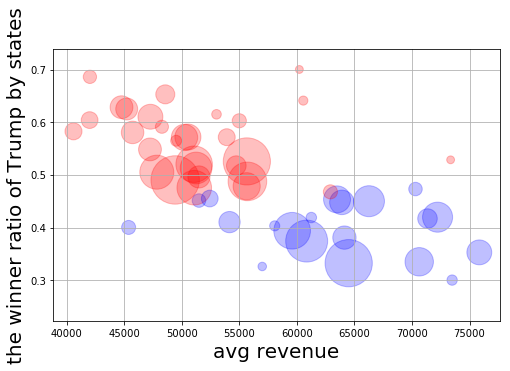

In [102]:
plt.rcParams['font.sans-serif']=['SimHei'] # 用来正常显示中文标签
colors = result_df.Winner.map({'Trump':'Red', 'Clinton':'Blue'}) # 根据赢家设置颜色
spot_size = result_df.TotalVote / 4000.0 # 设置点大小
plt.figure(figsize=(8, 5)) 
plt.scatter(x = result_df['Income'], 
            y = result_df['T-Ratio'],
            s=spot_size,
            c=colors,
            alpha=0.25)
# plt.scatter( x = result_df['Income'], y = result_df['T-Ratio'], s=spot_size, alpha=0.25)
plt.xlabel('avg revenue',fontsize=20)
plt.ylabel('the winner ratio of Trump by states',fontsize=20)
plt.grid(True) # 添加网格
plt.show()

# 画图

(-4.0, 4.0)

([<matplotlib.axis.XTick at 0x10c1b0690>,
 <a list of 9 Text xticklabel objects>)

(-1.0, 1.0)

([<matplotlib.axis.YTick at 0x10c3c6f50>,
 <a list of 5 Text yticklabel objects>)

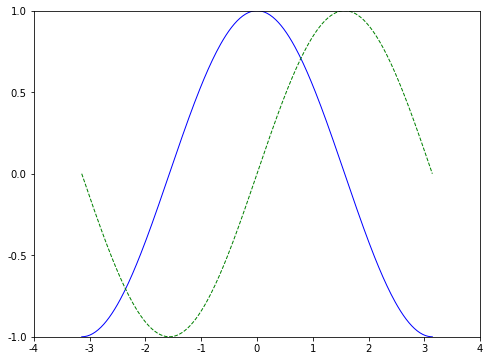

In [106]:
plt.figure(figsize=(8, 6))
# 从1X1的网格创建一个子图片
plt.subplot(1, 1, 1)
X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C, S = np.cos(X), np.sin(X)
# 用宽度为1（像素）的蓝色连续直线绘制cosine
plt.plot(X, C, color="blue", linewidth=1.0, linestyle="-")
# 用宽度为1（像素）的绿色连续直线绘制sine
plt.plot(X, S, color="green", linewidth=1.0, linestyle="--")
# 设置x轴的极值
plt.xlim(-4.0, 4.0)
# 设置x轴的刻度值
plt.xticks(np.linspace(-4, 4, 9, endpoint=True))
# 设置y轴的极值
plt.ylim(-1.0, 1.0)
# 设置y轴的刻度值
plt.yticks(np.linspace(-1, 1, 5, endpoint=True))
# 在屏幕上显示结果
plt.show()

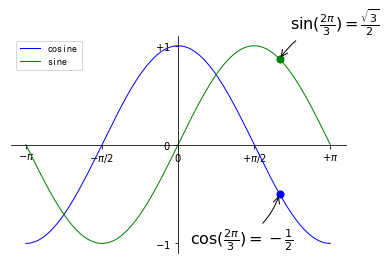

In [32]:
# 移动轴和图例
ax = plt.gca()  # gca stands for 'get current axis'
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))
plt.setp(ax, 
         xticks=[-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
         xticklabels=[r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])
plt.setp(ax, 
         yticks=[-1, 0, +1],
         yticklabels=[r'$-1$', r'$0$', r'$+1$'])
ax.plot(X, C, color="blue", linewidth=1.0, linestyle='-', label='cosine')
# 用宽度为1（像素）的绿色连续直线绘制sine
ax.plot(X, S, color="green", linewidth=1.0, linestyle='-', label="sine")
ax.legend(loc='upper left') # 顺序要在plot后面
# 特殊点标注
t = 2 * np.pi / 3
ax.annotate(r'$\sin(\frac{2\pi}{3})=\frac{\sqrt{3}}{2}$',
            xy=(t, np.sin(t)), xycoords='data',
            xytext=(+10, +30), textcoords='offset points', fontsize=16,
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
ax.annotate(r'$\cos(\frac{2\pi}{3})=-\frac{1}{2}$',
            xy=(t, np.cos(t)), xycoords='data',
            xytext=(-90, -50), textcoords='offset points', fontsize=16,
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
ax.scatter([t,], [np.sin(t),], 50, color ='green')
ax.scatter([t,], [np.cos(t),], 50, color ='blue')
plt.show()

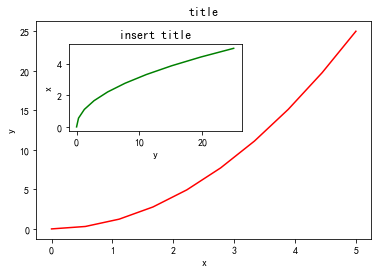

In [33]:
# 图嵌套
x = np.linspace(0, 5, 10)
y = x ** 2

fig = plt.figure()

# axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)
axes = fig.gca()
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes

axes.plot(x, y, 'r')

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title')

# insert
axes2.plot(y, x, 'g')
axes2.set_xlabel('y')
axes2.set_ylabel('x')
axes2.set_title('insert title');

plt.show()

In [86]:
result_df.groupby(by=result_df['StateName'], as_index=False).sum()

,TotalVote,VoteTrump,VoteClinton
StateName,,,
alabama,2078165,1306925.0,718084.0
alaska,246588,130415.0,93007.0
arizona,1960053,972900.0,888374.0
arkansas,1121684,677904.0,378729.0
california,8930459,2969532.0,5488261.0
colorado,2401267,1075770.0,1126384.0
connecticut,1528817,637919.0,823360.0
delaware,441535,185103.0,235581.0
district-of-columbia,280272,11553.0,260223.0


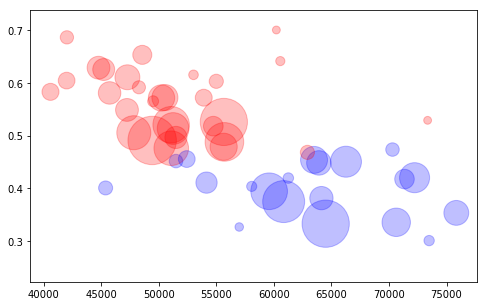

In [109]:
plt.rcParams['font.sans-serif']=['SimHei'] # 用来正常显示中文标签
colors = result_df.Winner.map({'Trump':'Red', 'Clinton':'Blue'}) # 根据赢家设置颜色
spot_size = result_df.TotalVote / 4000.0 # 设置点大小
plt.figure(figsize=(8, 5)) 
plt.scatter(x = result_df['Income'], 
            y = result_df['T-Ratio'],
            s=spot_size,
            c=colors,
            alpha=0.25)

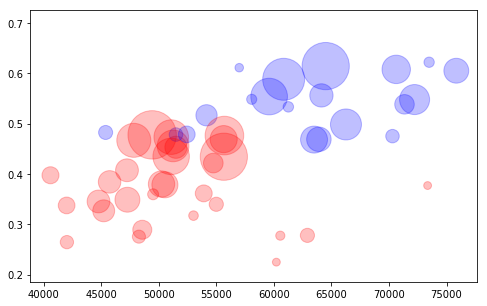

In [107]:
plt.rcParams['font.sans-serif']=['SimHei'] # 用来正常显示中文标签
colors = result_df.Winner.map({'Trump':'Red', 'Clinton':'Blue'}) # 根据赢家设置颜色
spot_size = result_df.TotalVote / 4000.0 # 设置点大小
plt.figure(figsize=(8, 5)) 
plt.scatter(x = result_df['Income'], 
            y = result_df['C-Ratio'],
            s=spot_size,
            c=colors,
            alpha=0.25)

(array([   0.,    0.,    0.,    0.,    0.,    1.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    4.,
           2.,    6.,    4.,    6.,    8.,   15.,   12.,   14.,   25.,
          35.,   28.,   53.,   62.,   61.,   70.,   73.,   66.,   77.,
          81.,   93.,   95.,   78.,  107.,  120.,   71.,  100.,   93.,
          74.,   73.,   79.,   64.,   44.,   47.,   44.,   29.,   19.,
          11.,   12.,   10.,   14.,    6.,    1.,    4.,    4.,    1.,
           1.,    1.,    0.,    0.,    1.,    0.,    1.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.]),
 array([-10.  ,  -9.75,  -9.5 ,  -9.25,  -9.  ,  -8.75,  -8.5 ,  -8.25,
         -8.  ,  -7.75,  -7.5 ,  -7.25,  -7.  ,  -6.75,  -6.5 ,  -6.25,
         -6.  ,  -5.75,  -5.5 ,  -5.25,  -5.  ,  -4.75,  -4.5 ,  -4.25,
         -4.  ,  -3.75,  -3.5 ,  -3.25,  -3.  ,  -2.75,  -2.5 ,  -2.25,
         -2.  ,  -1.75,  -1.5 ,  -1.25,  -1.  ,  -0.75,  -0.5 ,  -0.25,
      

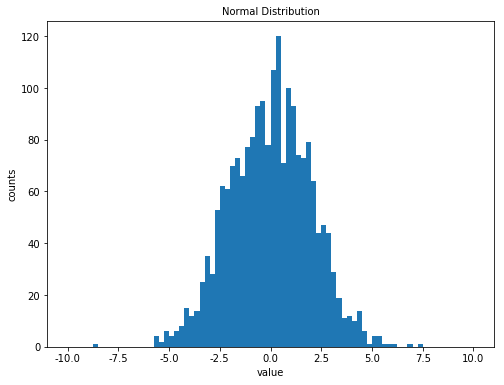

In [112]:
# 正态分布柱状图
mu =0.0
sigma = 2.0
samples = np.random.normal(loc=mu, scale=sigma, size=2000)
plt.figure(num=1, figsize=(8,6))
plt.title('Normal Distribution', size=10)
plt.xlabel('value', size=10)
plt.ylabel('counts', size=10)
plt.hist(samples, bins=80, range=(-10,10)) # bins=柱子数目

[68 83 90 77 89 73 68]


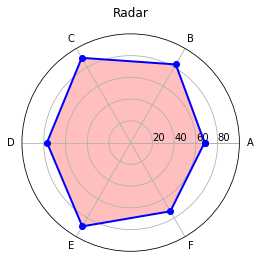

In [113]:
def radar_plot():
    """
    radar plot
    """
    # 生成测试数据
    labels = np.array(["A", "B", "C", "D", "E", "F"])
    data = np.array([68, 83, 90, 77, 89, 73])
    theta = np.linspace(0, 2*np.pi, len(data), endpoint=False)

    # 数据预处理
    data = np.concatenate((data, [data[0]]))
    print(data)
    theta = np.concatenate((theta, [theta[0]]))

    # 画图方式
    plt.subplot(111, polar=True)
    plt.title("Radar")

    # 设置"theta grid"/"radar grid"
    plt.thetagrids(theta*(180/np.pi), labels=labels)
    plt.rgrids(np.arange(20, 100, 20), labels=np.arange(20, 100, 20), angle=0)
    plt.ylim(0, 100)

    # 画雷达图,并填充雷达图内部区域
    plt.plot(theta, data, "bo-", linewidth=2)
    plt.fill(theta, data, color="red", alpha=0.25)

    # 图形显示
    plt.show()
    return

radar_plot()

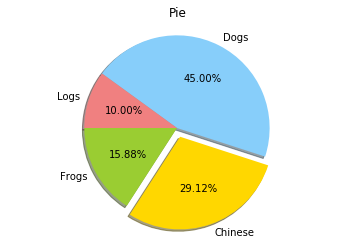

In [114]:
def pie_plot():
    """
    pie plot
    """
    # 生成测试数据
    sizes = [15.88, 29.12, 45, 10]
    labels = ["Frogs", "Chinese", "Dogs", "Logs"]
    colors = ["yellowgreen", "gold", "lightskyblue", "lightcoral"]

    # 设置标题
    plt.title("Pie")

    # 设置突出参数
    explode = [0, 0.1, 0, 0]

    # 画饼状图
    patches, l_text, p_text = plt.pie(sizes, 
                                      explode=explode, 
                                      labels=labels,
                                      colors=colors,
                                      autopct="%.2f%%", 
                                      shadow=True,
                                      startangle=180)
    plt.axis("equal")

    # 图形显示
    plt.show()
    return

pie_plot()

In [37]:
# 实战：销售数据分析
df=pd.read_excel('pl_09\\朝阳医院2016年销售数据.xlsx',sheet_name='Sheet1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6578 entries, 0 to 6577
Data columns (total 7 columns):
购药时间    6576 non-null object
社保卡号    6576 non-null float64
商品编码    6577 non-null float64
商品名称    6577 non-null object
销售数量    6577 non-null float64
应收金额    6577 non-null float64
实收金额    6577 non-null float64
dtypes: float64(5), object(2)
memory usage: 359.8+ KB
